In [1]:
!pip uninstall -y transformers accelerate datasets evaluate
!pip install transformers datasets evaluate accelerate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 50.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 44.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.4/81.4 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 219.1/219.1 kB 26.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 118.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 26.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 72.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━

## Set Models

In [2]:
model_checkpoint = "google/vit-base-patch16-224-in21k" # pre-trained model from which to fine-tune
resnet = 'microsoft/resnet-50'
covnet = 'facebook/convnext-large-224'
mobilevit = 'apple/mobilevit-small'


batch_size = 32 # batch size for training and evaluation

## Call Datasets

In [3]:
from datasets import load_dataset
#dataset = load_dataset('cifar10')
dataset = load_dataset('rajistics/indian_food_images')



print(dataset)

Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/5328 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/941 [00:00<?, ? examples/s]

Dataset parquet downloaded and prepared to /root/.cache/huggingface/datasets/rajistics___parquet/rajistics--indian_food_images-b57e32e607ea3957/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 5328
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 941
    })
})


In [4]:
type(dataset)

datasets.dataset_dict.DatasetDict

In [5]:
print(dataset['train'])

Dataset({
    features: ['image', 'label'],
    num_rows: 5328
})


In [6]:
from datasets import load_metric

metric = load_metric("accuracy")

<ipython-input-6-350fcae91df9>:3: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  metric = load_metric("accuracy")


In [7]:
example = dataset["train"][10]
example

{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=751x532 at 0x7FB668DDBEE0>,
 'label': 8}

In [8]:
dataset["train"].features


{'image': Image(decode=True, id=None),
 'label': ClassLabel(names=['burger', 'butter_naan', 'chai', 'chapati', 'chole_bhature', 'dal_makhani', 'dhokla', 'fried_rice', 'idli', 'jalebi', 'kaathi_rolls', 'kadai_paneer', 'kulfi', 'masala_dosa', 'momos', 'paani_puri', 'pakode', 'pav_bhaji', 'pizza', 'samosa'], id=None)}

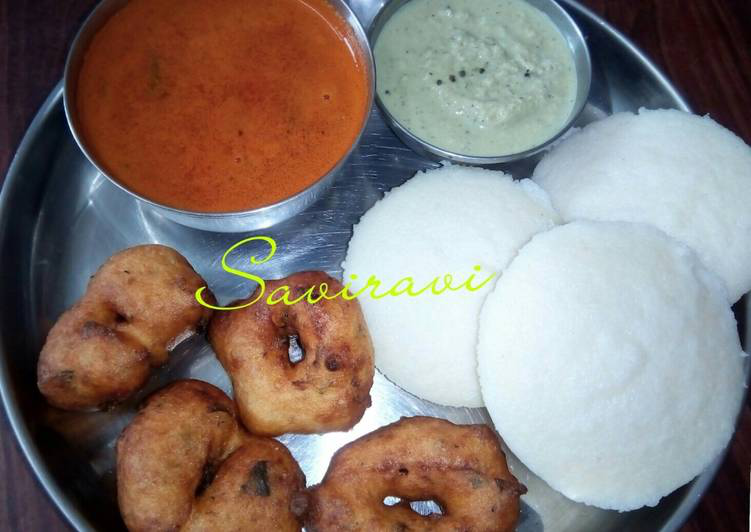

In [9]:
example['image']

In [10]:
labels = dataset["train"].features["label"].names
label2id, id2label = dict(), dict()
for i, label in enumerate(labels):
    label2id[label] = i
    id2label[i] = label

id2label[2]

'chai'

In [11]:
label2id


{'burger': 0,
 'butter_naan': 1,
 'chai': 2,
 'chapati': 3,
 'chole_bhature': 4,
 'dal_makhani': 5,
 'dhokla': 6,
 'fried_rice': 7,
 'idli': 8,
 'jalebi': 9,
 'kaathi_rolls': 10,
 'kadai_paneer': 11,
 'kulfi': 12,
 'masala_dosa': 13,
 'momos': 14,
 'paani_puri': 15,
 'pakode': 16,
 'pav_bhaji': 17,
 'pizza': 18,
 'samosa': 19}

In [12]:
id2label

{0: 'burger',
 1: 'butter_naan',
 2: 'chai',
 3: 'chapati',
 4: 'chole_bhature',
 5: 'dal_makhani',
 6: 'dhokla',
 7: 'fried_rice',
 8: 'idli',
 9: 'jalebi',
 10: 'kaathi_rolls',
 11: 'kadai_paneer',
 12: 'kulfi',
 13: 'masala_dosa',
 14: 'momos',
 15: 'paani_puri',
 16: 'pakode',
 17: 'pav_bhaji',
 18: 'pizza',
 19: 'samosa'}

## Preprocess the Data for All Models

In [13]:
# preprocessing the data

from transformers import AutoImageProcessor

image_processor  = AutoImageProcessor.from_pretrained(model_checkpoint)
image_processor 

ViTImageProcessor {
  "do_normalize": true,
  "do_rescale": true,
  "do_resize": true,
  "image_mean": [
    0.5,
    0.5,
    0.5
  ],
  "image_processor_type": "ViTImageProcessor",
  "image_std": [
    0.5,
    0.5,
    0.5
  ],
  "resample": 2,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "height": 224,
    "width": 224
  }
}

In [14]:
image_processor_resnet  = AutoImageProcessor.from_pretrained(resnet)
image_processor_resnet

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


ConvNextImageProcessor {
  "crop_pct": 0.875,
  "do_normalize": true,
  "do_rescale": true,
  "do_resize": true,
  "image_mean": [
    0.485,
    0.456,
    0.406
  ],
  "image_processor_type": "ConvNextImageProcessor",
  "image_std": [
    0.229,
    0.224,
    0.225
  ],
  "resample": 3,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "shortest_edge": 224
  }
}

In [15]:
image_processor_covnet  = AutoImageProcessor.from_pretrained(covnet)
image_processor_covnet

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


ConvNextImageProcessor {
  "crop_pct": 0.875,
  "do_normalize": true,
  "do_rescale": true,
  "do_resize": true,
  "image_mean": [
    0.485,
    0.456,
    0.406
  ],
  "image_processor_type": "ConvNextImageProcessor",
  "image_std": [
    0.229,
    0.224,
    0.225
  ],
  "resample": 3,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "shortest_edge": 224
  }
}

In [16]:
image_processor_mobilevit  = AutoImageProcessor.from_pretrained(mobilevit)
image_processor_mobilevit

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


MobileViTImageProcessor {
  "crop_size": {
    "height": 256,
    "width": 256
  },
  "do_center_crop": true,
  "do_flip_channel_order": true,
  "do_flip_channels": true,
  "do_rescale": true,
  "do_resize": true,
  "image_processor_type": "MobileViTImageProcessor",
  "resample": 2,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "shortest_edge": 288
  }
}

In [17]:
from torchvision.transforms import (
    CenterCrop,
    Compose,
    Normalize,
    RandomHorizontalFlip,
    RandomResizedCrop,
    Resize,
    ToTensor,
)

normalize = Normalize(mean=image_processor.image_mean, std=image_processor.image_std)
if "height" in image_processor.size:
    size = (image_processor.size["height"], image_processor.size["width"])
    crop_size = size
    max_size = None
elif "shortest_edge" in image_processor.size:
    size = image_processor.size["shortest_edge"]
    crop_size = (size, size)
    max_size = image_processor.size.get("longest_edge")

train_transforms = Compose(
        [
            RandomResizedCrop(crop_size),
            RandomHorizontalFlip(),
            ToTensor(),
            normalize,
        ]
    )

val_transforms = Compose(
        [
            Resize(size),
            CenterCrop(crop_size),
            ToTensor(),
            normalize,
        ]
    )
test_transforms = Compose(
        [
            Resize(size),
            CenterCrop(crop_size),
            ToTensor(),
            normalize,
        ]
    )

def preprocess_train(example_batch):
    """Apply train_transforms across a batch."""
    example_batch["pixel_values"] = [train_transforms(image.convert("RGB")) for image in example_batch["image"]]
    return example_batch

def preprocess_val(example_batch):
    """Apply val_transforms across a batch."""
    example_batch["pixel_values"] = [val_transforms(image.convert("RGB")) for image in example_batch["image"]]
    return example_batch

def preprocess_test(example_batch):
    """Apply test_transforms across a batch."""
    example_batch["pixel_values"] = [test_transforms(image.convert("RGB")) for image in example_batch["image"]]
    return example_batch

## Create Train/Validation/Test Datasets

In [18]:
# split up training into training + validation; + test
splits = dataset["train"].train_test_split(test_size=0.1)
train_ds = splits['train']
val_ds = splits['test']
test_ds = dataset['test']

In [19]:
train_ds.set_transform(preprocess_train)
val_ds.set_transform(preprocess_val)
#add test dataset
test_ds.set_transform(preprocess_test)

In [20]:
len(train_ds)

4795

In [21]:
len(val_ds)

533

In [22]:
test_ds[0]

{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1280x720 at 0x7FB3CFCF3490>,
 'label': 16,
 'pixel_values': tensor([[[-0.2784, -0.2235, -0.1137,  ...,  0.0588,  0.6000,  0.7882],
          [-0.2863, -0.1843, -0.1529,  ...,  0.2314,  0.4824,  0.8431],
          [-0.2627, -0.1765, -0.2078,  ...,  0.6706,  0.4039,  0.7804],
          ...,
          [-0.2000, -0.1686, -0.2863,  ...,  0.3647,  0.3882,  0.3176],
          [-0.1922, -0.2078, -0.3020,  ...,  0.3647,  0.3882,  0.3255],
          [-0.1765, -0.3020, -0.2392,  ...,  0.3569,  0.3882,  0.3569]],
 
         [[-0.6392, -0.5529, -0.4980,  ..., -0.5451, -0.1059,  0.3333],
          [-0.6471, -0.5216, -0.5294,  ..., -0.3176, -0.2078,  0.3255],
          [-0.6157, -0.5294, -0.5765,  ...,  0.2078, -0.2314,  0.1843],
          ...,
          [-0.5373, -0.4824, -0.5843,  ...,  0.1294,  0.1608,  0.0667],
          [-0.5216, -0.4980, -0.5922,  ...,  0.1294,  0.1529,  0.1451],
          [-0.4667, -0.5608, -0.5373,  ...,  0.1451

In [23]:
train_ds[0]

{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1000x562 at 0x7FB3D18C60E0>,
 'label': 9,
 'pixel_values': tensor([[[ 0.8039,  0.7725,  0.7412,  ...,  0.8980,  0.9059,  0.9294],
          [ 0.8275,  0.7961,  0.8118,  ...,  0.8980,  0.8980,  0.9216],
          [ 0.8510,  0.7804,  0.7725,  ...,  0.8745,  0.9451,  0.9216],
          ...,
          [ 0.1294, -0.0039, -0.1529,  ...,  0.3490,  0.3333,  0.3804],
          [ 0.0824, -0.0353, -0.1451,  ...,  0.3804,  0.3412,  0.3961],
          [ 0.1686, -0.0353, -0.1765,  ...,  0.4824,  0.3647,  0.4196]],
 
         [[ 0.3804,  0.3333,  0.3255,  ...,  0.5765,  0.6157,  0.6627],
          [ 0.4039,  0.3804,  0.4118,  ...,  0.5608,  0.5843,  0.6471],
          [ 0.4510,  0.4039,  0.3882,  ...,  0.5137,  0.6157,  0.6235],
          ...,
          [-0.1216, -0.2941, -0.4196,  ...,  0.0039, -0.0118,  0.0196],
          [-0.1608, -0.3255, -0.4039,  ...,  0.0118, -0.0353,  0.0118],
          [-0.0980, -0.3176, -0.4275,  ...,  0.0745,

## Train Models

In [24]:
#Training the Model

from transformers import AutoModelForImageClassification, TrainingArguments, Trainer

model = AutoModelForImageClassification.from_pretrained(
    model_checkpoint, 
    label2id=label2id,
    id2label=id2label,
    ignore_mismatched_sizes = True, # provide this in case you're planning to fine-tune an already fine-tuned checkpoint
)

Some weights of the model checkpoint at google/vit-base-patch16-224-in21k were not used when initializing ViTForImageClassification: ['pooler.dense.bias', 'pooler.dense.weight']
- This IS expected if you are initializing ViTForImageClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ViTForImageClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [25]:
from transformers import ResNetForImageClassification

model_resnet = AutoModelForImageClassification.from_pretrained(
    resnet, 
    label2id=label2id,
    id2label=id2label,
    ignore_mismatched_sizes = True, # provide this in case you're planning to fine-tune an already fine-tuned checkpoint
)

Some weights of ResNetForImageClassification were not initialized from the model checkpoint at microsoft/resnet-50 and are newly initialized because the shapes did not match:
- classifier.1.weight: found shape torch.Size([1000, 2048]) in the checkpoint and torch.Size([20, 2048]) in the model instantiated
- classifier.1.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([20]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [26]:
model_covnet = AutoModelForImageClassification.from_pretrained(
    covnet, 
    label2id=label2id,
    id2label=id2label,
    ignore_mismatched_sizes = True, # provide this in case you're planning to fine-tune an already fine-tuned checkpoint
)

Some weights of ConvNextForImageClassification were not initialized from the model checkpoint at facebook/convnext-large-224 and are newly initialized because the shapes did not match:
- classifier.weight: found shape torch.Size([1000, 1536]) in the checkpoint and torch.Size([20, 1536]) in the model instantiated
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([20]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [27]:
model_mobilevit = AutoModelForImageClassification.from_pretrained(
    mobilevit, 
    label2id=label2id,
    id2label=id2label,
    ignore_mismatched_sizes = True, # provide this in case you're planning to fine-tune an already fine-tuned checkpoint
)

Some weights of MobileViTForImageClassification were not initialized from the model checkpoint at apple/mobilevit-small and are newly initialized because the shapes did not match:
- classifier.weight: found shape torch.Size([1000, 640]) in the checkpoint and torch.Size([20, 640]) in the model instantiated
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([20]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [28]:
model_name = model_checkpoint.split("/")[-1]

args = TrainingArguments(
    f"{model_name}-finetuned-eurosat",
    remove_unused_columns=False,
    evaluation_strategy = "epoch",
    save_strategy = "epoch",
    learning_rate=5e-5,
    per_device_train_batch_size=batch_size,
    gradient_accumulation_steps=4,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=3,
    warmup_ratio=0.1,
    logging_steps=10,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    #push_to_hub=True,
)

In [29]:
model_name_resnet = resnet.split("/")[-1]

args_resnet = TrainingArguments(
    #f"{model_name_resnet}-finetuned-eurosat",
    f"{model_name_resnet}",
    remove_unused_columns=False,
    evaluation_strategy = "epoch",
    save_strategy = "epoch",
    learning_rate=5e-5,
    per_device_train_batch_size=batch_size,
    gradient_accumulation_steps=4,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=3,
    warmup_ratio=0.1,
    logging_steps=10,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    #push_to_hub=True,
)

In [30]:
f"{model_name_resnet}"

'resnet-50'

In [31]:
model_name_covnet = covnet.split("/")[-1]

args_covnet = TrainingArguments(
    #f"{model_name_covnet}-finetuned-eurosat",
    f"{model_name_covnet}",
    remove_unused_columns=False,
    evaluation_strategy = "epoch",
    save_strategy = "epoch",
    learning_rate=5e-5,
    per_device_train_batch_size=batch_size,
    gradient_accumulation_steps=4,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=3,
    warmup_ratio=0.1,
    logging_steps=10,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    #push_to_hub=True,
)

In [32]:
model_name_mobilevit = mobilevit.split("/")[-1]

args_mobilevit = TrainingArguments(
    #f"{model_name_mobilevit}-finetuned-eurosat",
    f"{model_name_mobilevit}",
    remove_unused_columns=False,
    evaluation_strategy = "epoch",
    save_strategy = "epoch",
    learning_rate=5e-5,
    per_device_train_batch_size=batch_size,
    gradient_accumulation_steps=4,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=3,
    warmup_ratio=0.1,
    logging_steps=10,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    #push_to_hub=True,
)

In [33]:
import numpy as np

# the compute_metrics function takes a Named Tuple as input:
# predictions, which are the logits of the model as Numpy arrays,
# and label_ids, which are the ground-truth labels as Numpy arrays.
def compute_metrics(eval_pred):
    """Computes accuracy on a batch of predictions"""
    predictions = np.argmax(eval_pred.predictions, axis=1)
    return metric.compute(predictions=predictions, references=eval_pred.label_ids)

In [34]:
import torch

def collate_fn(examples):
    pixel_values = torch.stack([example["pixel_values"] for example in examples])
    labels = torch.tensor([example["label"] for example in examples])
    return {"pixel_values": pixel_values, "labels": labels}

In [35]:
trainer = Trainer(
    model, # change
    args, #change
    train_dataset=train_ds,
    eval_dataset=val_ds,
    tokenizer=image_processor, # change
    compute_metrics=compute_metrics,
    data_collator=collate_fn,
)

In [36]:
trainer_resnet = Trainer(
    model_resnet, # change
    args_resnet, #change
    train_dataset=train_ds,
    eval_dataset=val_ds,
    tokenizer=image_processor_resnet, # change
    compute_metrics=compute_metrics,
    data_collator=collate_fn,
)

In [37]:
trainer_covnet = Trainer(
    model_covnet, # change
    args_covnet, #change
    train_dataset=train_ds,
    eval_dataset=val_ds,
    tokenizer=image_processor_covnet, # change
    compute_metrics=compute_metrics,
    data_collator=collate_fn,
)

In [38]:
trainer_mobilevit = Trainer(
    model_mobilevit, # change
    args_mobilevit, #change
    train_dataset=train_ds,
    eval_dataset=val_ds,
    tokenizer=image_processor_mobilevit, # change
    compute_metrics=compute_metrics,
    data_collator=collate_fn,
)

## Evaluate Models

In [39]:
train_results = trainer.train()
# rest is optional but nice to have
trainer.save_model()
trainer.log_metrics("train", train_results.metrics)
trainer.save_metrics("train", train_results.metrics)
trainer.save_state()

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:407: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy
0,2.573700,2.304813,0.756098
2,1.883000,1.753524,0.866792
2,1.632400,1.610856,0.881801


***** train metrics *****
  epoch                    =         2.96
  total_flos               = 1024835526GF
  train_loss               =       2.1315
  train_runtime            =   0:38:20.91
  train_samples_per_second =        6.252
  train_steps_per_second   =        0.048


In [40]:
train_results_resnet = trainer_resnet.train()
# rest is optional but nice to have
trainer_resnet.save_model()
trainer_resnet.log_metrics("train", train_results_resnet.metrics)
trainer_resnet.save_metrics("train", train_results_resnet.metrics)
trainer_resnet.save_state()

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:407: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy
0,2.971200,2.958375,0.099437
2,2.939100,2.931566,0.103189
2,2.926800,2.924958,0.136961


***** train metrics *****
  epoch                    =        2.96
  total_flos               = 281234460GF
  train_loss               =      2.9495
  train_runtime            =  0:21:35.79
  train_samples_per_second =      11.101
  train_steps_per_second   =       0.086


In [41]:
train_results_covnet = trainer_covnet.train()
# rest is optional but nice to have
trainer_covnet.save_model()
trainer_covnet.log_metrics("train", train_results_covnet.metrics)
trainer_covnet.save_metrics("train", train_results_covnet.metrics)
trainer_covnet.save_state()

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:407: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy
0,2.888100,2.762560,0.562852
2,2.458000,2.371289,0.697936
2,2.252000,2.229239,0.746717


***** train metrics *****
  epoch                    =         2.96
  total_flos               = 2343851104GF
  train_loss               =       2.5932
  train_runtime            =   1:21:56.07
  train_samples_per_second =        2.926
  train_steps_per_second   =        0.023


In [42]:
train_results_mobilevit = trainer_mobilevit.train()
# rest is optional but nice to have
trainer_mobilevit.save_model()
trainer_mobilevit.log_metrics("train", train_results_mobilevit.metrics)
trainer_mobilevit.save_metrics("train", train_results_mobilevit.metrics)
trainer_mobilevit.save_state()

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:407: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy
0,2.946100,2.911456,0.187617
2,2.849500,2.810813,0.350844
2,2.789600,2.775596,0.395872


***** train metrics *****
  epoch                    =       2.96
  total_flos               = 59120853GF
  train_loss               =     2.8793
  train_runtime            = 0:16:59.42
  train_samples_per_second =     14.111
  train_steps_per_second   =      0.109


In [43]:
metrics = trainer.evaluate()
# some nice to haves:
trainer.log_metrics("eval", metrics)
trainer.save_metrics("eval", metrics)

***** eval metrics *****
  epoch                   =       2.96
  eval_accuracy           =     0.8818
  eval_loss               =     1.6109
  eval_runtime            = 0:00:41.33
  eval_samples_per_second =     12.894
  eval_steps_per_second   =      0.411


In [44]:
metrics_resnet = trainer_resnet.evaluate()
# some nice to haves:
trainer_resnet.log_metrics("eval", metrics_resnet)
trainer_resnet.save_metrics("eval", metrics_resnet)

***** eval metrics *****
  epoch                   =       2.96
  eval_accuracy           =      0.137
  eval_loss               =      2.925
  eval_runtime            = 0:00:25.76
  eval_samples_per_second =     20.685
  eval_steps_per_second   =       0.66


In [45]:
metrics_covnet = trainer_covnet.evaluate()
# some nice to haves:
trainer_covnet.log_metrics("eval", metrics_covnet)
trainer_covnet.save_metrics("eval", metrics_covnet)

***** eval metrics *****
  epoch                   =       2.96
  eval_accuracy           =     0.7467
  eval_loss               =     2.2292
  eval_runtime            = 0:01:03.10
  eval_samples_per_second =      8.446
  eval_steps_per_second   =      0.269


In [46]:
metrics_mobilevit = trainer_mobilevit.evaluate()
# some nice to haves:
trainer_mobilevit.log_metrics("eval", metrics_mobilevit)
trainer_mobilevit.save_metrics("eval", metrics_mobilevit)

***** eval metrics *****
  epoch                   =       2.96
  eval_accuracy           =     0.3959
  eval_loss               =     2.7756
  eval_runtime            = 0:00:23.58
  eval_samples_per_second =     22.597
  eval_steps_per_second   =      0.721


In [47]:
#evaluating the model

outputs = trainer.predict(test_ds)
y_pred = outputs.predictions.argmax(1)
#final_score = metric.compute(predictions=outputs)
outputs.metrics

{'test_loss': 1.6245309114456177,
 'test_accuracy': 0.873538788522848,
 'test_runtime': 73.0973,
 'test_samples_per_second': 12.873,
 'test_steps_per_second': 0.41}

In [48]:
outputs_resnet = trainer_resnet.predict(test_ds)
y_pred_resnet = outputs_resnet.predictions.argmax(1)
#final_score = metric.compute(predictions=outputs)
outputs_resnet.metrics

{'test_loss': 2.9335439205169678,
 'test_accuracy': 0.13602550478214664,
 'test_runtime': 44.958,
 'test_samples_per_second': 20.931,
 'test_steps_per_second': 0.667}

In [49]:
outputs_covnet = trainer_covnet.predict(test_ds)
y_pred_covnet = outputs_covnet.predictions.argmax(1)
#final_score = metric.compute(predictions=outputs)
outputs_covnet.metrics

{'test_loss': 2.264075517654419,
 'test_accuracy': 0.7258235919234857,
 'test_runtime': 112.0504,
 'test_samples_per_second': 8.398,
 'test_steps_per_second': 0.268}

In [50]:
outputs_mobilevit = trainer_mobilevit.predict(test_ds)
y_pred_mobilevit = outputs_mobilevit.predictions.argmax(1)
#final_score = metric.compute(predictions=outputs)
outputs_mobilevit.metrics

{'test_loss': 2.786630392074585,
 'test_accuracy': 0.41870350690754515,
 'test_runtime': 41.7942,
 'test_samples_per_second': 22.515,
 'test_steps_per_second': 0.718}

In [51]:
# do accuracy, f1, 

#len(y_pred) #941
#print(y_pred) # as expected

#test_ds[0]['label'] # this is it. take these values and put into np

test_labels = []

for i in range(941):
  labels = test_ds[i]['label']
  test_labels.append(labels)



In [52]:
print(len(y_pred)) #941
print(len(test_labels)) #941

941
941


In [53]:
#test_labels

In [54]:
type(y_pred) # np array
type(test_labels) #list

test_labels = np.asarray(test_labels)
type(test_labels) # np array

numpy.ndarray

In [55]:
from sklearn.metrics import classification_report, confusion_matrix, log_loss

# Print the confusion matrix
print(confusion_matrix(test_labels, y_pred))

# Print precision, recall, f1-score, and accuracy
print(classification_report(test_labels, y_pred))



[[51  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 38  0 11  1  0  0  0  1  0  0  1  1  0  0  0  0  0  0  0]
 [ 0  0 55  0  0  0  0  0  1  0  0  0  0  0  1  0  0  0  0  0]
 [ 0  1  0 57  2  1  0  0  1  0  2  0  0  3  0  0  0  0  0  0]
 [ 0  0  1  0 52  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  2  3  0  0 47  0  1  0  0  0  0  0  0  0  0  0  2  0  0]
 [ 0  0  0  0  0  0 52  0  0  0  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1 43  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  1  0  0  0 44  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  1  0  0 35  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  1  0  0  1  1  0 39  0  0  0  0  0  0  0  1  1]
 [ 0  0  0  0  0  1  0  0  0  0  0 53  0  0  0  0  0  0  0  0]
 [ 0  0  3  0  0  0  7  0  1  0  0  2 25  0  2  0  0  0  0  0]
 [ 1  0  0  0  4  0  0  0  0  0  3  0  0 37  0  0  0  2  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  2  1  0 45  0  1  0  0  0]
 [ 0  0  1  0  9  0  0  0  0  0  1  0  0  0  1  0  5  1

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [56]:
# Print the confusion matrix
print(confusion_matrix(test_labels, y_pred_resnet))

# Print precision, recall, f1-score, and accuracy
print(classification_report(test_labels, y_pred_resnet))

[[ 1  0  0  6 26  0  0  0  3  0 14  2  0  0  0  0  0  0  0  0]
 [ 0  0  0 20 27  0  0  0  2  0  3  0  0  0  0  0  0  1  0  0]
 [ 0  0 24  0 30  0  0  0  1  0  0  0  0  0  0  0  0  2  0  0]
 [ 1  0  0 20 41  0  0  0  0  0  1  3  0  0  0  0  0  1  0  0]
 [ 0  0  0  2 51  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  1  1 39  0  0  0  3  0  0  7  0  0  0  0  0  4  0  0]
 [ 0  0  2  6 37  0  0  3  2  0  1  1  0  0  0  0  0  1  0  0]
 [ 0  0  0  2 20  0  0 20  0  0  0  0  0  0  0  0  0  2  0  0]
 [ 0  0  1  6 33  0  0  0  5  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  5 21  0  0  4  2  0  1  3  0  0  0  0  0  2  0  0]
 [ 0  0  0  9 31  0  0  0  1  0  1  2  0  0  0  0  0  0  0  0]
 [ 0  0  1  1 47  0  0  0  2  0  0  3  0  0  0  0  0  0  0  0]
 [ 0  0  2  2 29  0  0  3  2  0  1  0  0  0  0  0  0  1  0  0]
 [ 0  0  0  5 40  0  0  0  0  0  0  1  0  0  0  0  0  1  0  0]
 [ 0  0  0  2 39  0  0  2  3  0  1  1  0  0  0  0  0  1  0  0]
 [ 0  0  0  1 15  0  0  0  1  0  1  0  0  0  0  0  0  0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [57]:
# Print the confusion matrix
print(confusion_matrix(test_labels, y_pred_covnet))

# Print precision, recall, f1-score, and accuracy
print(classification_report(test_labels, y_pred_covnet))

[[49  0  0  0  1  0  0  2  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 24  0 20  3  1  0  0  0  0  0  2  0  1  0  0  0  2  0  0]
 [ 0  0 54  2  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  2  0 55  6  0  0  0  2  0  0  2  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 51  0  0  3  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  5  1  1 32  0  2  0  0  0  8  0  0  0  0  0  5  0  0]
 [ 0  0  0  0  1  0 41  1  2  0  0  5  0  0  0  0  0  3  0  0]
 [ 0  0  0  0  0  0  0 43  0  0  0  0  0  0  0  0  0  1  0  0]
 [ 0  0  1  1  3  0  0  1 38  0  0  2  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  3  0 31  0  1  0  0  0  0  1  1  0  0]
 [ 0  1  0 13  4  0  0  3  1  0 21  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  1  0  1  0  0  0 52  0  0  0  0  0  0  0  0]
 [ 0  0  8  3  4  0  5  2  3  0  0  0  7  3  4  0  1  0  0  0]
 [ 0  0  0  7  6  0  0  1  0  0  0  0  0 29  0  0  0  4  0  0]
 [ 0  0  1  1  2  0  0  0  0  1  0  4  0  0 39  0  1  0  0  0]
 [ 0  0  0  0 11  0  0  1  1  0  0  0  0  0  1  0  2  2

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [58]:
# Print the confusion matrix
print(confusion_matrix(test_labels, y_pred_mobilevit))

# Print precision, recall, f1-score, and accuracy
print(classification_report(test_labels, y_pred_mobilevit))

[[39  0  1  1  1  0  0  2  1  0  0  1  1  0  1  2  1  1  0  0]
 [ 2 15  3  6  4  1  4  1  2  0  5  0  1  1  1  1  0  1  4  1]
 [ 3  0 33  0  1  3  1  1  3  2  0  1  0  3  3  0  1  1  1  0]
 [ 4  4  3 18  9  4  3  1  4  2  5  0  0  5  1  0  0  2  0  2]
 [ 0  3  0  1 37  2  1  0  0  0  1  0  1  1  2  1  1  3  0  0]
 [ 0  1  5  0  3 18  3  1  6  1  6  2  0  1  1  0  2  2  3  0]
 [ 1  1  1  1  0  1 29  0  2  1  0  0  4  2  4  0  1  3  2  0]
 [ 0  0  1  0  0  1  1 27  2  0  0  1  1  0  2  1  2  5  0  0]
 [ 0  0  3  0  2  1  2  0 22  0  0  0  0  2  5  2  1  6  0  0]
 [ 0  0  1  0  1  1  0  4  0 22  1  1  1  0  0  0  4  2  0  0]
 [10  1  2  1  3  0  3  1  2  0  4  2  3  4  0  0  2  0  1  5]
 [ 2  0  1  0  2  6  2  2  2  0  0 26  1  2  0  0  5  3  0  0]
 [ 1  1  3  0  2  0  5  1  1  2  2  1  9  3  6  1  1  1  0  0]
 [ 0  1  7  2  2  0  3  0  1  0  3  1  3 14  1  2  2  1  0  4]
 [ 0  2  0  0  1  1  2  4  3  0  0  1  3  0 18  1  9  3  1  0]
 [ 0  0  0  0  2  0  0  3  2  0  0  0  0  2  3  3  1  2